In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

# Remove NA columns
y2015 = y2015.dropna(axis='columns', how="all") 

# Convert Interest Rate to numeric.
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')



/home/john/python3_virtualenv/python3_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Drop other columns with many unique variables
y2015.drop(['emp_title', 'zip_code', 'earliest_cr_line', 'revol_util', 'desc', 'payment_plan_start_date',
            'sub_grade', 'addr_state', 'desc', 'last_credit_pull_d', 'debt_settlement_flag_date',
           'settlement_date', 'hardship_end_date', 'hardship_start_date'], 1, inplace=True)

In [4]:
y2015.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,settlement_status,settlement_amount,settlement_percentage,settlement_term
421090,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,8 years,RENT,31000.0,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN
421091,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,10+ years,MORTGAGE,79000.0,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN
421092,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,RENT,64400.0,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN
421093,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,RENT,35000.0,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN
421094,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,RENT,100000.0,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN


Feature ranking:
1. feature 1 (0.453425)
2. feature 0 (0.142040)
3. feature 2 (0.127298)
4. feature 4 (0.093376)
5. feature 3 (0.045119)
6. feature 6 (0.030278)
7. feature 5 (0.028320)
8. feature 8 (0.027751)
9. feature 7 (0.026617)
10. feature 9 (0.025775)


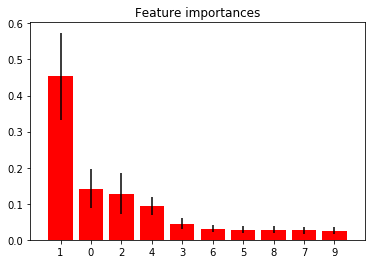

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Modify dataset
X = y2015.drop('loan_status', 1)
y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

# Build a classification task using 10 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [20]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

#Create the model
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X, y, cv=10)

/home/john/python3_virtualenv/python3_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/john/python3_virtualenv/python3_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/john/python3_virtualenv/python3_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/john/python3_virtualenv/python3_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

array([0.91089109, 0.93069307, 0.95049505, 0.95049505, 0.96      ,
       0.92      , 0.87878788, 0.96969697, 0.94949495, 0.86868687])